<a href="https://colab.research.google.com/github/Anup191495/Anup12year/blob/main/Decision_Tree(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


  PassengersId Pclass Sex   Age SibSp Parch Survived
1            1      3   1  34.5     1     0        0
2            2      1   0    47     1     0        1
3            3      3   0    62     0     0        1
4            4      1   0    27     1     0        1
5            5      3   1    22     0     0        0
Accuracy:  0.6865671641791045
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<Sex &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<Pclass &le; 2.5<br/>gini = 0.387<br/>samples = 217<br/>value = [57, 160]<br/>class = 1>, fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<Age &le; 0.5<br/>gini = 0.097<br/>samples = 117<br/>value = [6, 111]<br/>class = 1>, fillcolor="#44a2e6"] ;
1 -> 2 ;
3 [label=<PassengersId &le; 176.0<br/>gini = 0.391<br/>samples = 15<br/>value = [4, 11]<br/>cla

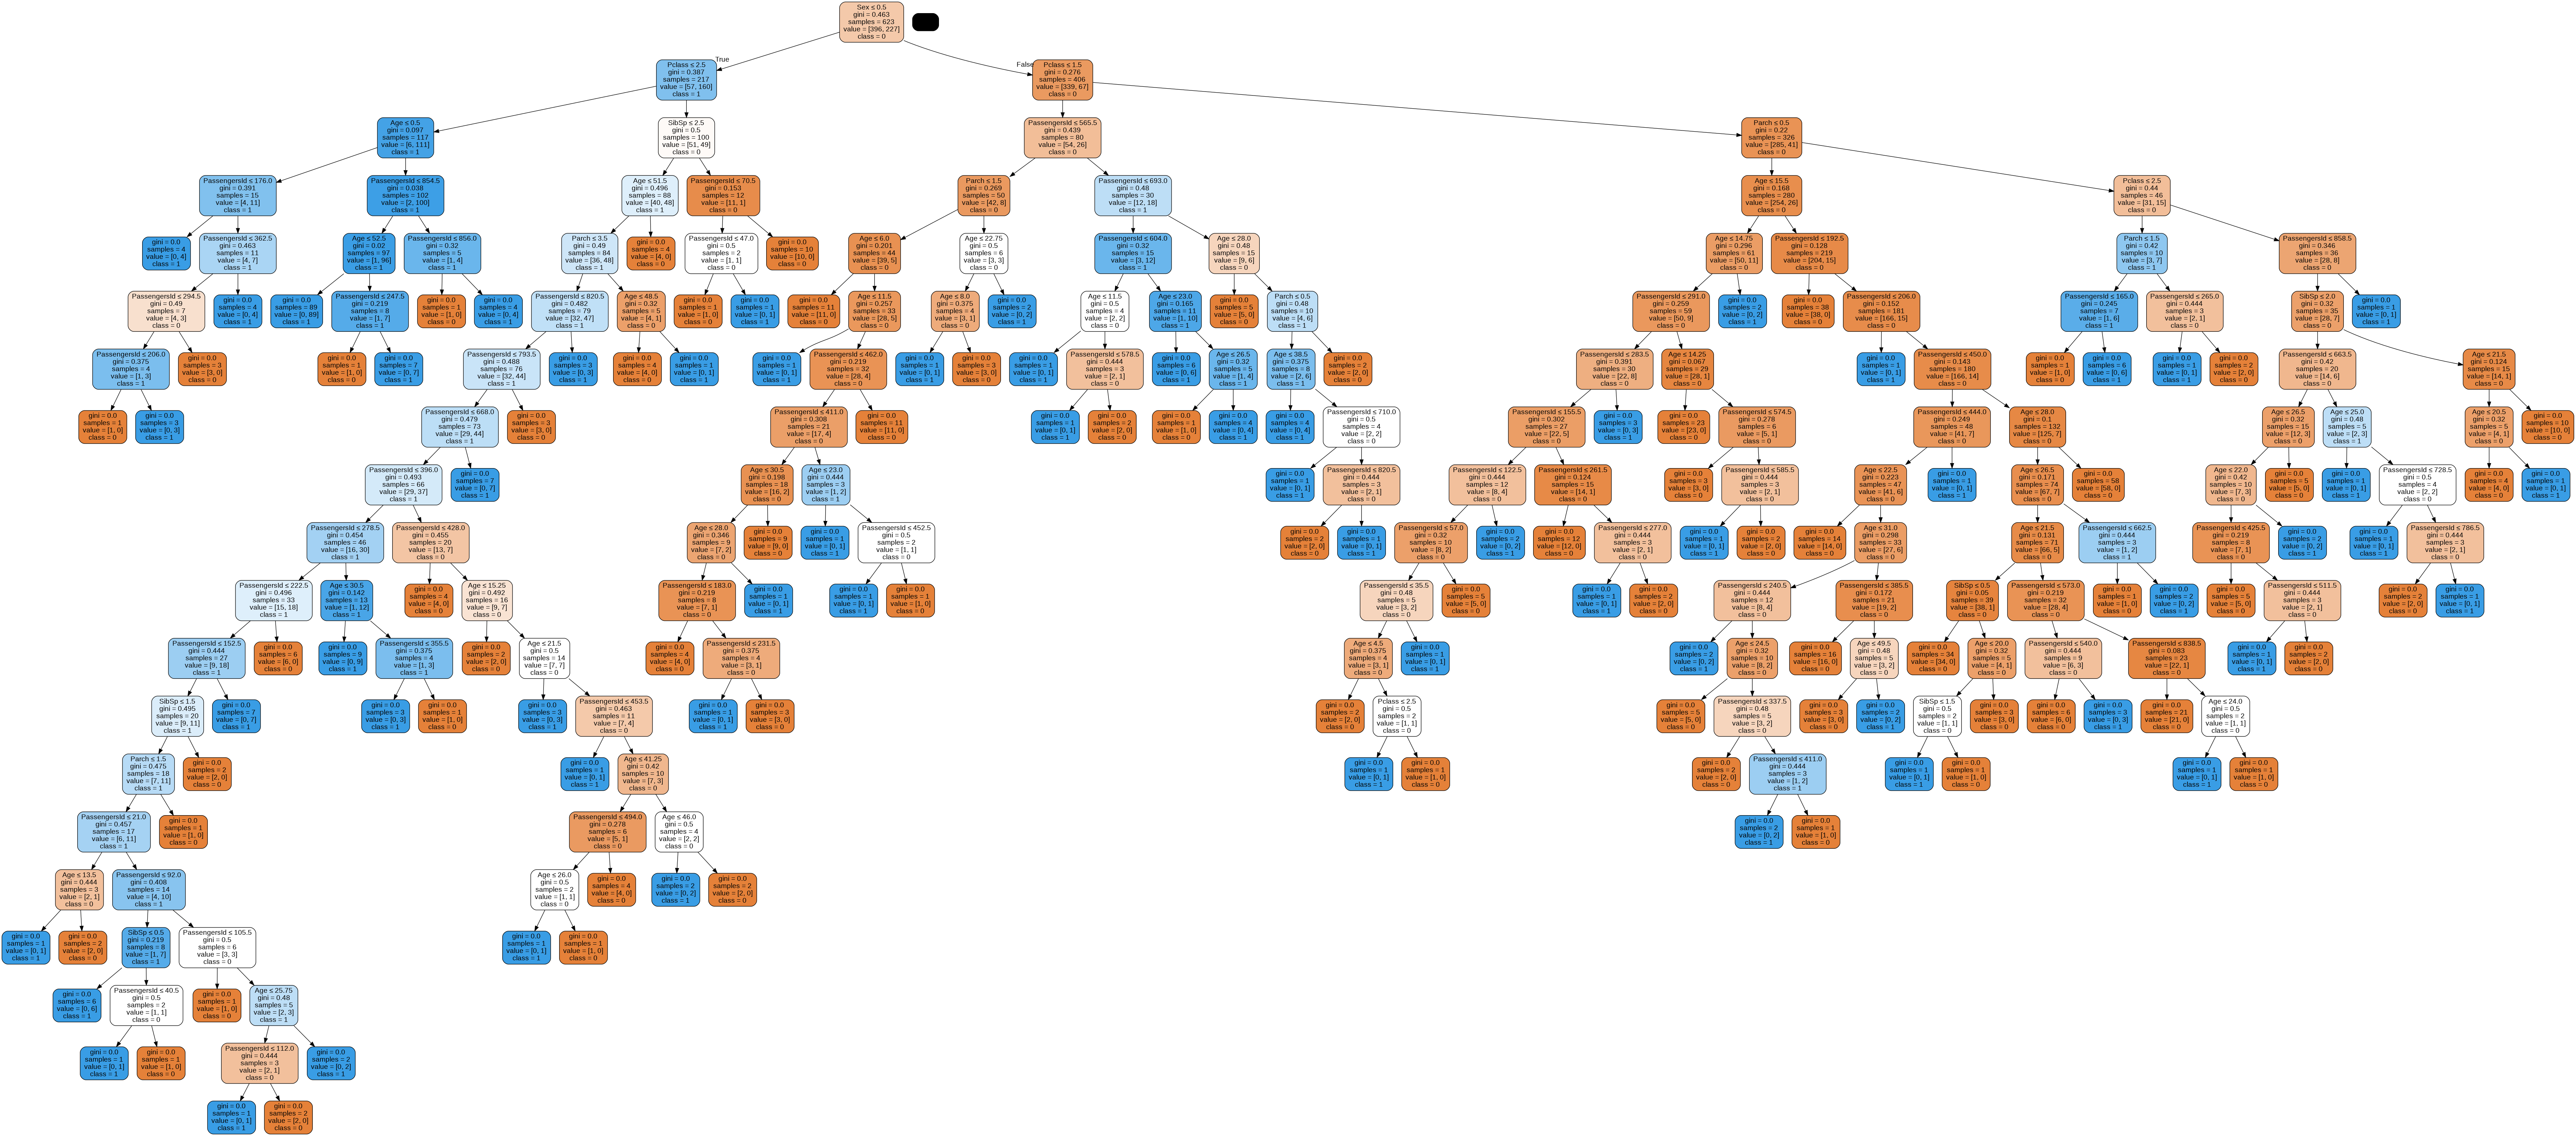

In [9]:
import csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus 

col_names = ['PassengersId','Pclass','Sex','Age','SibSp','Parch','Survived']
df = pd.read_csv('titanic.csv', names = col_names).iloc[1:]
print(df.head())
features = ['PassengersId','Pclass','Sex','Age','SibSp','Parch']
X = df[features]
Y = df.Survived
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=features, class_names=['0', '1'])
print(dot_data.getvalue())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())